# 【Prager法による木製桁の強度計算図表】　 藤田　輝昭
（防衛大学校理工学研究報告　第5巻第1号 昭和42年6月）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager 
import pandas as pd

prop = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\meiryo.ttc', size=12)


%matplotlib inline

In [2]:
# r = 引張破壊応力/圧縮破壊応力
r = 2

In [3]:
#K/H(=k)計算、領域1
def k_1(u,l): return 2/(r+1)

#K/H(=k)計算、領域2
def k_2(u,l): return (2/(r+1))*(u+l)      

#K/H(=k)計算、領域3,4
def k_34(u,l):
    e = r*l-u
    if e == 0:
        return -1
    else:
        return ((r+1)/2)*(l**2/e)   

#K/H(=k)計算、領域5,6,7
def k_567(u,l):
    e=(1-(r/(r+1))*(u+l))**2 - (1-u)**2 + l**2
    if e < 0:
        return -1
    else:
        return 1-(r/(r+1))*(u+l)+np.sqrt(e)

#K/H(=k)計算、領域8,9
def k_89(u,l):
    e = u+l
    if e == 0:
        return -1
    else:
        return ((r+1)/(2*r))*(l - u + (2*u)/(e))        
        

In [4]:
#M/(曲げ強度)(=m)計算、領域1
def m_1(u,l,k): return (3*r-1)/(r+1)/6

#M/(曲げ強度)(=m)計算、領域2
def m_2(u,l,k): return u-(u**2)/2+(l**2)/2-2/3/(r+1)*(u+l)**2

#M/(曲げ強度)(=m)計算、領域3, 4
def m_34(u,l,k): return u-(u**2)/2+(l**2)*r/6-2/3*u*l

#M/(曲げ強度)(=m)計算、領域5, 6, 7
def m_567(u,l,k): 
    return u-(u**2)/2-(l**2)*r/2+(r+1)/6/k*(2*l**3-(k+u-1)**2*(k-2*u+2))

#M/(曲げ強度)(=m)計算、領域8, 9
def m_89(u,l,k):
    return u-(u**2)/2-(l**2)*r/2+(r+1)/6/k*(2*l**3-(6*(k-1)*u-3*(k-2)*u**2-2*u**3))

In [5]:
#領域区分判定
def area_div(u , l):
 
    #領域区分外
    if u + l > 1 : return 0  
    
    #領域区分1
    if u + l == 1: return 1
    
    #領域区分2
    if 1 >= l >= k_2(u, l): return 2

    #領域区分3, 4
    if 1-u > k_34(u, l) > l:
        if l > k_34(u, l)*(r/(r+1)):
            return 3
        else:
            return 4
    
    #領域区分5, 6. 7
    if 1 > k_567(u, l) > 1-u:
        if l > k_567(u, l)*(r/(r+1)):
            return 5
        elif 1-u > k_567(u, l)*(r/(r+1)) > l:
            return 6
        else:
            return 7
 
    #領域区分8, 9
    if k_89(u, l)*(r/(r+1)) > 1-u:
        return 8
    else:
        return 9
    

In [6]:
#M/(曲げ強度)(=m)計算
def calc_m(u, l):
    
    #領域区分判定
    a=area_div(u,l)
    
    #領域区分に応じたサブ関数をコール
    if a == 1:
        return m_1(u,l,k_1(u,l))
    elif a == 2:
        return m_2(u,l,k_2(u,l))
    elif a == 3 or a==4:
        return m_34(u,l,k_34(u,l))
    elif a == 5 or a==6 or a==7:
        return m_567(u,l,k_567(u,l))
    elif a == 8 or a==9:
        return m_89(u,l,k_89(u,l))

In [7]:
#領域区分マップの作成
n = 1000
u = np.linspace(0, 1, n)
l = np.linspace(0, 1, n)
U, L = np.meshgrid(u, l)

#領域区分の計算
A = np.array(list(map(area_div,U.flatten(), L.flatten()))).reshape(n,n)

# 曲げ強度マップの計算
M = np.array(list(map(calc_m,U.flatten(), L.flatten()))).reshape(n,n)

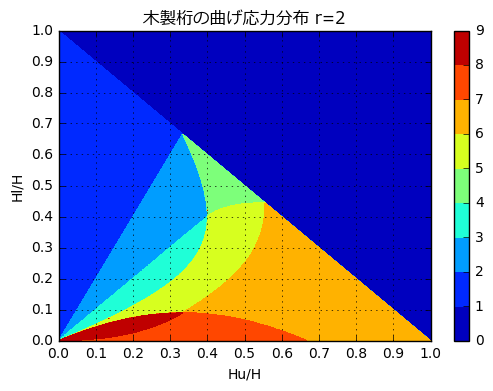

In [8]:
#マップの表示
fig = plt.figure()
im = plt.contourf(U, L, A, levels=range(10))

plt.title('木製桁の曲げ応力分布 r=2', fontproperties=prop,size=12)
plt.xlabel('Hu/H')
plt.ylabel('Hl/H')
plt.grid(True)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

fig.colorbar(im)
plt.show()

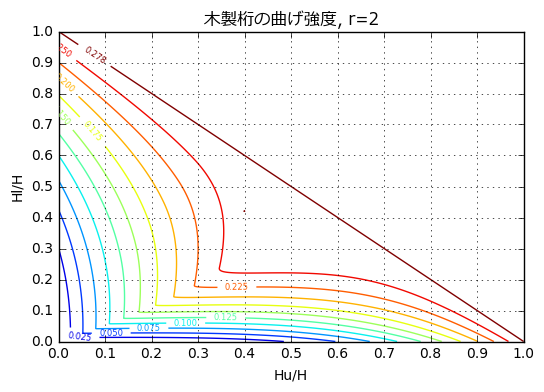

In [9]:
#マップの表示
CS= plt.contour(U, L, M, levels=[0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.277777777777777])
plt.clabel(CS, inline=1, fontsize=6)

plt.title('木製桁の曲げ強度, r=2', fontproperties=prop,size=12)
plt.xlabel('Hu/H')
plt.ylabel('Hl/H')
plt.grid(True)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

#fig.colorbar(im)
plt.show()

In [10]:
#結果をファイル出力
np.savetxt('u.csv',U, delimiter=',')
np.savetxt('l.csv',L, delimiter=',')
np.savetxt('a.csv',A, delimiter=',', fmt='%i')
pd.DataFrame(M).to_csv('m.csv',index=False,header=False)